# CS 3654 Team Project

### Team Info:  
Project Title:  Correlations on Climate Change  
Team name:  Greenhouse Guys  
Team member names and PIDs: Atharva Haldankar (ahaldankar), Fairuz Ahmed (ahfairuz), Andrew Ahn (aandrew17), Jonathan Jwa (jonathanyjwa23), Justin Perez (justinmp)

### Project Introduction:

**Initial Description:** We plan to analyze climate data based on country to understand which countries are responsible for the majority of greenhouse gas emissions, what the characteristics of those countries are, and what negative effects greenhouse emissions have on people and the environment.

**Potential research questions:**  
    1. Which countries produce the most greenhouse gases? Which countries produce the least?  
    2. Is there a correlation between GDP and greenhouse gas emissions?  
    3. Does a country's use of renewable energy decrease their emissions?  
    4. Does a country's population or land area have anything to do with greenhouse emissions?  
    5. What forms of government do the countries that produce the most greenhouse gases have?  
    6. Do greenhouse emissions come primarily from urban or rural settings?  
    7. Which countries are affected most by greenhouse emissions?  
    8. Do emissions impact human life expectancy?  
    
**Potential source data:**
1. https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles
2. https://worldpopulationreview.com/country-rankings/greenhouse-gas-emissions-by-country
3. https://www.kaggle.com/saurabhshahane/green-house-gas-historical-emission-data  
4. https://www.kaggle.com/brendan45774/countries-life-expectancy

### Individual Contributions: 
QAC on Population/Land Area vs. Greenhouse Emissions: Atharva  
QAC on GDP vs. Greenhouse Emissions: Justin

### Procedural Notes
- When analyzing population vs. CO2 emissions, we tried fitting a logarithmic model to the data, due to how the data was structured. However, since this model had a lower R-value than the linear model, we decided not to include those results. 
- For population vs. CO2 emissions, we also tried fitting a polynomial model. However, despite specifying the model as a polynomial of degree 2, we still got a linear fit, since the model computed an x^2 coefficient of 0. 
- For our initial questions, we used the CO2 emission estimates column from the country profiles kaggle dataset (link 1). However, since emissions data from the world population review site (link 2) is slightly more up to date, we used this source for some of the later questions. 

## Question: Does a Country's Population or Land Area have anything to do with greenhouse emissions? (Atharva)

Does population or land area affect the volume of greenhouse emissions? By determining a correlation between these variables, we can better determine which countries are major contributors of greenhouse emissions. For example, if population and greenhouse emissions are strongly correlated together, then we can focus on countries with large populations, since those nations will have the greatest influence over the volume of emissions. Furthermore, we'll get a better sense geographically for which countries are major contributors of emissions. 

In order to answer this question, data from https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles will be utilized. This data contains general information about each of the countries as well as social, economic, and environmental indicators. The dataset was extracted from information published by the United Nations, so it is a good authoritative source. 

Before analyzing the data, it will be helpful to define what units population, land area, and greenhouse emissions are measured in. Population will be measured in thousands of people, land area will be measured in square kilometers, and greenhouse emissions will be quantified in million tons / tons per capita. 

## Analysis: 
First we import some libraries that we will need. Matplotlib helps with plotting and visualization, and the sklearn.linear_model module will allow a linear regression model to fit a line to the given data. 

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Read in the original country profile data

In [2]:
# Read the original data into a pandas dataframe. 
dirty = pandas.read_csv("country_profile_variables.csv")

Here's a glance at the data:   

In [3]:
dirty.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


These are the data types. Notice how the Surface area (km2) column has an object data type. We should probably clean this column so the data is in a more useful form. 

In [4]:
dirty.dtypes

country                                                        object
Region                                                         object
Surface area (km2)                                             object
Population in thousands (2017)                                  int64
Population density (per km2, 2017)                            float64
Sex ratio (m per 100 f, 2017)                                 float64
GDP: Gross domestic product (million current US$)               int64
GDP growth rate (annual %, const. 2005 prices)                 object
GDP per capita (current US$)                                  float64
Economy: Agriculture (% of GVA)                                object
Economy: Industry (% of GVA)                                  float64
Economy: Services and other activity (% of GVA)               float64
Employment: Agriculture (% of employed)                        object
Employment: Industry (% of employed)                           object
Employment: Services

Before doing any further analysis, we retain a copy of the original data. This way, we can track any modifications we choose to make. 

In [5]:
# Make a copy of the original dataframe and process data for analysis
clean = dirty.copy()

Clean the data by taking out the ~ symbol  
Note: For computation purposes, we will treat countries that have a really small land area (~0) as having no land area, even though this is clearly not the case. 

In [6]:
clean['Surface area (km2)'] = dirty['Surface area (km2)'].map(lambda val: int(val.replace('~', '')))

Some countries have a land area < 0 or emission estimates that are < 0. 

In [7]:
# TODO: Maybe interpolate or replace the country surface area with data pulled from other sources
clean[clean['Surface area (km2)'] < 0]

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
25,"Bonaire, Sint Eustatius and Saba",Caribbean,-99,25,77.4,-99.0,-99,-99,-99.0,-99,...,-99,56,-99,0.3/13.3,0,208,-99,-99,-99,-99
130,Mayotte,EasternAfrica,-99,253,674.8,96.7,-99,-99,-99.0,-99,...,...,88,16.1,-99,0,19,-99,-99,-99,-99
193,Sudan,NorthernAfrica,-99,40533,23.0,99.9,79546,4.9,1977.0,32.4,...,26.6,133,-99,15.4/0.4,682,16,-99,-99,1.09,-99


In [8]:
# Remove countries that meet this criteria. 
clean[clean['CO2 emission estimates (million tons/tons per capita)'] < 0]

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
7,Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356,4.1,14764.5,1.9,...,65.2,55,22.3,0.5/5.8,-99,84,97.9/97.9,91.4/91.4,0.12,-99
38,Cayman Islands,Caribbean,264,62,256.5,100.4,3726,0.7,62132.0,0.3,...,77.0,74,52.9,0.5/9.2,-99,130,97.4/...,95.6/...,-99,-99
41,Channel Islands,NorthernEurope,180,165,870.1,98.4,-99,-99,-99.0,-99,...,-99,-99,4.2,-99,-99,-99,-99,-99,-99,-99
43,"China, Hong Kong SAR",EasternAsia,1106,7365,7014.2,85.1,309236,2.4,42431.0,0.1,...,84.9,64,-99,46.2/6.4,-99,83,-99,-99,-99,-99
49,Cook Islands,Polynesia,236,17,72.4,97.4,294,5.5,14118.7,8.1,...,-99,75,62.9,0.1/3.4,-99,48,99.9/99.9,97.6/97.6,-99,-99
80,Gibraltar,SouthernEurope,6,35,3457.1,101.8,-99,-99,-99.0,-99,...,65.0,31,0.0,0.5/16.5,-99,259,-99,-99,-99,-99
85,Guam,Micronesia,549,164,304.1,102.6,-99,-99,-99.0,-99,...,73.1,99,46.3,-99,-99,-99,99.5/99.5,89.8/89.8,-99,-99
91,Holy See,SouthernEurope,0,1,1800.0,219.2,-99,-99,-99.0,-99,...,-99,1,-99,-99,-99,-99,-99,-99,-99,-99
133,Monaco,WesternEurope,2,39,25969.8,94.7,6258,5.4,165870.6,-99,...,93.4,21,-99,-99,-99,-99,100.0/...,100.0/...,-99,-99


We will filter out rows that have a negative Surface area (km2) or negative CO2 emission estimates.  
The UN likely didn't have accurate data on those countries

In [9]:
nonNegSA = clean[clean['Surface area (km2)'] >= 0]
filtClean = nonNegSA[nonNegSA['CO2 emission estimates (million tons/tons per capita)'] >= 0]

Sanity check: We would expect that 20 rows are filtered based on the emission estimates column and 3 rows are filtered out based on surface area. That gives 229 rows - 23 rows = 206 rows. 

In [10]:
filtClean.shape

(206, 50)

In [11]:
filtClean.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955,3.0,4714.1,6.8,...,12.4,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99


Now that the data is thoroughly cleaned, we can begin visualization and analysis.  
We first create scatterplots for both Surface Area vs. CO2 emissions and Population (thousands) vs. CO2 emissions

<AxesSubplot:xlabel='Population in thousands (2017)', ylabel='CO2 emission estimates (million tons/tons per capita)'>

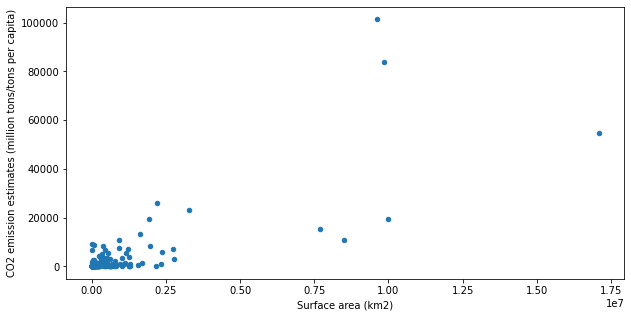

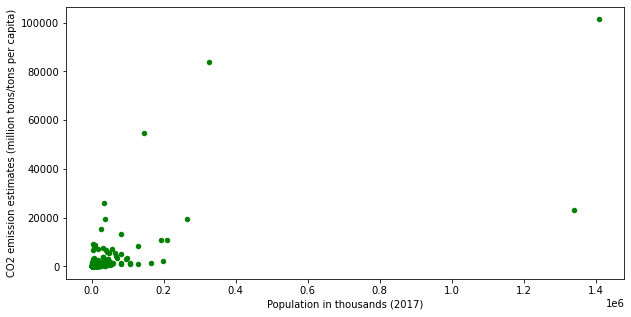

In [12]:
filtClean.plot.scatter(x='Surface area (km2)', y='CO2 emission estimates (million tons/tons per capita)', figsize=(10,5))
filtClean.plot.scatter(x='Population in thousands (2017)', y='CO2 emission estimates (million tons/tons per capita)', color='green', figsize=(10,5))

Then, we compute the Pearson correlation coefficients for Surface Area vs. CO2 emissions and for Population (thousands) vs. CO2.  

In [13]:
filtClean['Surface area (km2)'].corr(filtClean['CO2 emission estimates (million tons/tons per capita)'])

0.7781603436900913

In [14]:
filtClean['Population in thousands (2017)'].corr(filtClean['CO2 emission estimates (million tons/tons per capita)'])

0.6973538601474337

These R values are both near or in the 0.70-0.80 range, so they indicate a relatively good linear fit.  
Let's go ahead and create a linear regression model for both pairs of x,y data. 

In [15]:
# Fit the Surface Area vs. CO2 emissions data to a linear regression model. 
lmSA = LinearRegression().fit(filtClean[['Surface area (km2)']], filtClean[['CO2 emission estimates (million tons/tons per capita)']])
lmSA.coef_, lmSA.intercept_

(array([[0.00432998]]), array([-66.57587138]))

In [16]:
# Fit the Population (thousands) vs. CO2 emissions data to a linear regression model. 
lmPop = LinearRegression().fit(filtClean[['Population in thousands (2017)']], filtClean[['CO2 emission estimates (million tons/tons per capita)']])
lmPop.coef_, lmPop.intercept_

(array([[0.05184319]]), array([870.37176209]))

Create a new data table which has a column for predicted CO2 levels with the SA vs. CO2 data

In [17]:
# Used assign() to create a new DataFrame with the Predicted_CO2 column because of the 
# SettingWithCopy warning. 

# Create a predictedCO2 column for Surface Area
predictedCO2 = filtClean['Surface area (km2)']*lmSA.coef_[0] + lmSA.intercept_
filtCleanSA = filtClean.assign(Predicted_CO2 = predictedCO2)
filtCleanSA

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Predicted_CO2
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99,2760.310369
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99,57.902313
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99,10246.308376
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99,-64.549442
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955,3.0,4714.1,6.8,...,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99,5331.606715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Venezuela (Bolivarian Republic of),SouthAmerica,912050,31977,36.3,99.0,344331,-6.2,11068.9,5.3,...,328,53.1,185.2/6.1,7460,90,95.0/77.9,97.5/69.9,0.01,-99,3882.579842
223,Viet Nam,South-easternAsia,330967,95541,308.1,98.0,193241,6.7,2067.9,18.9,...,616,47.2,166.9/1.8,2977,30,99.1/96.9,94.4/69.7,1.73,-99,1366.503695
226,Yemen,WesternAsia,527968,28250,53.5,102.1,29688,-28.1,1106.4,14.7,...,298,1.0,22.7/0.9,668,12,72.0/46.5,92.5/34.1,2.99,-99,2219.513536
227,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255,2.9,1311.1,8.2,...,88,65.6,4.5/0.3,374,26,85.6/51.3,55.6/35.7,3.96,-99,3192.216936


Do the same, except for the Pop. (thousands) vs. CO2 data

In [18]:
# Create a predictedCO2 column for Population
predictedCO2 = filtClean['Population in thousands (2017)']*lmPop.coef_[0] + lmPop.intercept_
filtCleanPop = filtClean.assign(Predicted_CO2 = predictedCO2)
filtCleanPop

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Predicted_CO2
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99,2712.360334
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99,1022.272311
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99,3012.428723
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99,874.363688
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955,3.0,4714.1,6.8,...,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99,2414.469359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Venezuela (Bolivarian Republic of),SouthAmerica,912050,31977,36.3,99.0,344331,-6.2,11068.9,5.3,...,328,53.1,185.2/6.1,7460,90,95.0/77.9,97.5/69.9,0.01,-99,2528.161477
223,Viet Nam,South-easternAsia,330967,95541,308.1,98.0,193241,6.7,2067.9,18.9,...,616,47.2,166.9/1.8,2977,30,99.1/96.9,94.4/69.7,1.73,-99,5823.522062
226,Yemen,WesternAsia,527968,28250,53.5,102.1,29688,-28.1,1106.4,14.7,...,298,1.0,22.7/0.9,668,12,72.0/46.5,92.5/34.1,2.99,-99,2334.941904
227,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255,2.9,1311.1,8.2,...,88,65.6,4.5/0.3,374,26,85.6/51.3,55.6/35.7,3.96,-99,1756.579267


Visualize the results.  
Overlay the actual data with the predicted data for both x,y pairs. 

<AxesSubplot:xlabel='Surface area (km2)', ylabel='Predicted_CO2'>

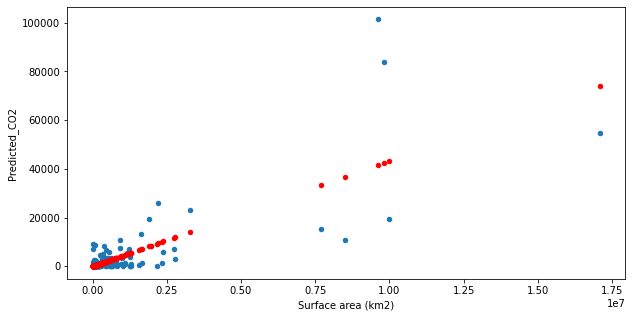

In [19]:
# Overlay the predicted CO2 levels on the plot with actual Surface Area vs. CO2 data. 
axSA = filtCleanSA.plot.scatter(x='Surface area (km2)', y='CO2 emission estimates (million tons/tons per capita)', figsize=(10,5))
filtCleanSA.plot.scatter(x='Surface area (km2)', y='Predicted_CO2', ax=axSA, color='red')

<AxesSubplot:xlabel='Population in thousands (2017)', ylabel='Predicted_CO2'>

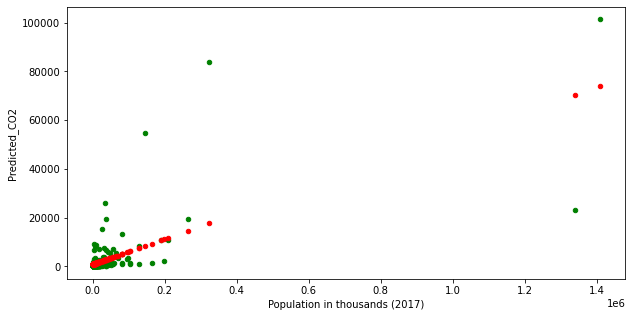

In [20]:
# Visualization Population (thousands) vs. CO2 data
axPop = filtCleanPop.plot.scatter(x='Population in thousands (2017)', y='CO2 emission estimates (million tons/tons per capita)', color='green', figsize=(10,5))
filtCleanPop.plot.scatter(x='Population in thousands (2017)', y='Predicted_CO2', ax=axPop, color='red')

Make sure the regression models are consistent with what we would expect. 

In [21]:
# Checkpoint: Verify the predicted columns are correct. 
filtCleanSA['Surface area (km2)'].corr(filtCleanSA['Predicted_CO2']), filtCleanPop['Population in thousands (2017)'].corr(filtCleanPop['Predicted_CO2'])

(0.9999999999999998, 1.0)

## Conclusion:

From the above analysis, it appears that land area and population do have some relation to CO2 emissions. In both cases, there is a positive correlation with a small slope. As surface area increases by 1 km^2, the model predicts an increase of 4.33*10^-3 millions of tons of CO2 / tons per capita. Similarly, as population increases by a thousand people, the model indicates that there should be about an increase of 0.052 millions of tons of CO2 / tons per capita. According to the linear regression model, countries which have a larger surface area on average produce more CO2 emissions. Likewise, countries which have a greater population on average produce more CO2 than countries with smaller populations. 

However, the models above are only approximations and leave out important information. From the graph of Surface Area (km2) vs. CO2 emissions, we can see a few countries which emit a substantially larger volume of CO2 than other nations. These countries also lie above the regression line for both plots, which means they emit more CO2 than the models predicted. 

One additional question that can be explored is whether population density is a better predictor of CO2 emissions than total population. A large population density value could be associated with urban areas and cities, and may therefore have a strong correlation with CO2 emissions. Another potential question to consider is whether CO2 emissions can be better predicted using both surface area and population as independent variables. This would require a multiple linear regression analysis. Finally, while the CO2 emissions from this dataset are normalized by population (e.g. divided by tons per capita), it may be worth considering what effect population and surface area have on raw CO2 emissions, for example in units of cubic meters. 

## Question: Is there a correlation between GDP and greenhouse gas emissions? (Justin)

Does GDP affect the volume of greenhouse emissions? By determining a correlation between these variables, we can better determine which countries are major contributors of greenhouse emissions.

In order to answer this question, data from https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles will be utilized. This data contains general information about each of the countries as well as social, economic, and environmental indicators. The dataset was extracted from information published by the United Nations, so it is a good authoritative source. 

Before analyzing the data, it will be helpful to define what units GDP, and greenhouse emissions are measured in. GDP will be measured in GDP per capita, in USD. CO2 emissions will be quantified in million tons / tons per capita.

## Analysis: 
We'll use numpy, pandas, and matplotlib to analyze the data. We'll also use the sklearn.linear_model module to fit a linear regression model if there is a correlation.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

We'll start by reading in our data.

In [23]:
dirty = pd.read_csv("country_profile_variables.csv")

Preview the data to see what the data looks like and the data types.

In [24]:
dirty.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


Lets extract the GDP and CO2 emissions data from the original dataset, into one clean dataframe.

In [25]:
clean = pd.DataFrame()

# copy 'GDP per capita (current US$)' and ''CO2 emission estimates (million tons/tons per capita)'
clean['Country'] = dirty['country']
clean['Region'] = dirty['Region']
clean['CO2 emission estimates (million tons/tons per capita)'] = dirty['CO2 emission estimates (million tons/tons per capita)']
clean['GDP per capita (current US$)'] = dirty['GDP per capita (current US$)']
clean.head()

,Country,Region,CO2 emission estimates (million tons/tons per capita),GDP per capita (current US$)
0,Afghanistan,SouthernAsia,63,623.2
1,Albania,SouthernEurope,84,3984.2
2,Algeria,NorthernAfrica,5900,4154.1
3,American Samoa,Polynesia,-99,-99.0
4,Andorra,SouthernEurope,1,39896.4


There seems to be a lot of missing data in the both columns, here labeled with -99. We'll remove all rows with missing data.

In [26]:
# remove rows with values less than 0
clean = clean[clean['CO2 emission estimates (million tons/tons per capita)'] >= 0]
clean = clean[clean['GDP per capita (current US$)'] >= 0]
clean.head()

,Country,Region,CO2 emission estimates (million tons/tons per capita),GDP per capita (current US$)
0,Afghanistan,SouthernAsia,63,623.2
1,Albania,SouthernEurope,84,3984.2
2,Algeria,NorthernAfrica,5900,4154.1
4,Andorra,SouthernEurope,1,39896.4
5,Angola,MiddleAfrica,3902,4714.1


We removed some rows. Lets count the number of missing rows.

In [27]:
dirty.shape[0] - clean.shape[0]

31

Lets plot the data.

<AxesSubplot:xlabel='CO2 emission estimates (million tons/tons per capita)', ylabel='GDP per capita (current US$)'>

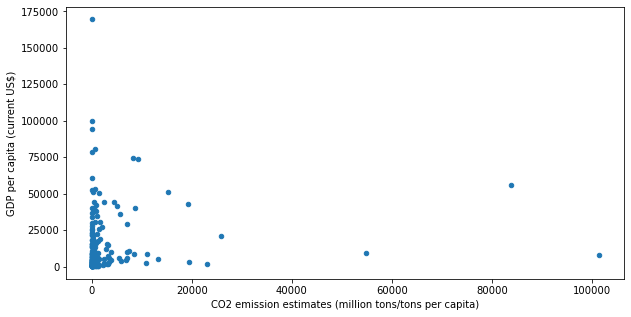

In [28]:
# plot CO2 emission estimates vs. GDP per capita
clean.plot.scatter(x='CO2 emission estimates (million tons/tons per capita)', y='GDP per capita (current US$)', figsize=(10,5))

This plot is not too helpful, there seems to be a lot of crowded points close to zero. Lets zoom in closer to zero to get a better understanding of the plot.

<AxesSubplot:xlabel='CO2 emission estimates (million tons/tons per capita)', ylabel='GDP per capita (current US$)'>

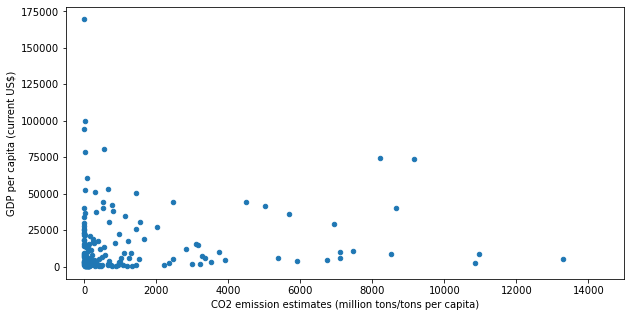

In [29]:
# plot, limit x to 15000
clean.plot.scatter(x='CO2 emission estimates (million tons/tons per capita)', y='GDP per capita (current US$)', figsize=(10,5), xlim=(-500,15000))

To the eye, there does not seem to be a correlation. Lets compute pearson's coeffecient.

In [30]:
# compute r
clean['CO2 emission estimates (million tons/tons per capita)'].corr(clean['GDP per capita (current US$)'])

0.09252113051856786

## Conclusion:

There is no correlation between GDP and CO2 emissions. This could be because GDP is not a good predictor of CO2 emissions, or because the data is not representative of the real world.

If our result is true, it could mean that CO2 emissions do not have any relationship with GDP. This could mean that countries with lots of exports do not have high CO2 emissions, and that they might rely on other countries for energy and other needs which produce CO2.

This hypothesis could be true due to the amount of outliers we see on our plot. Most countires have low CO2 emissions with an exception of a few countries with very high CO2 emissions.

## Question: What forms of government do the countries that produce the most greenhouse gases have? (Atharva)
What forms of government do nations which are major emitters of greenhouse gases have? By answering this question, we may be able to gain insight into whether certain forms of government are more effective than others in terms of reducing emissions. 

Data for this question will be taken taken from https://cddrl.fsi.stanford.edu/research/autocracies_of_the_world_dataset and https://worldpopulationreview.com/country-rankings/greenhouse-gas-emissions-by-country. 

The Stanford Center on Democracy, Development, and the Rule of Law is responsible for producing the first dataset. This dataset includes information on countries and their forms of government through the years 1950-2012. While this data might seem to be somewhat outdated, only data from 2012 will be analyzed. Furthermore, most governments throughout the world have remained stable for at least the last 10 years, so we expect the data to be accurate. In this dataset, government types are grouped into 5 categories: Democracy, Military, Monarchy, Multiparty, and Single Party. 

The second link lists out countries and their CO2 emissions in millions of tons. The world population review site was responsible for collecting this data, and we expect it to be both accurate and reliable. The data is also current, since it was taken in 2022. 

## Analysis: 
First, let's import both datasets and get a sense of what the data looks like. 

In [31]:
dirtyGovt = pd.read_excel("countries_by_govt.xls")
dirtyEmissions = pd.read_csv("emissions_Mt_country_2022.csv")

In [32]:
dirtyGovt.head()

,cyear,cntyr,ccode,scode,country,year,un_region,un_continent,reg_id,demo_nr,...,duration_r,personal,personal2,lindex,exname,change,tdate,trans,occup,interreg
0,21950,United States 1950,2,USA,United States,1950,Northern America,Americas,201.0,1.0,...,141.0,NaN,NaN,NaN,Harry Truman,0.0,07.04.1776,0.0,0.0,0.0
1,21951,United States 1951,2,USA,United States,1951,Northern America,Americas,201.0,1.0,...,142.0,NaN,NaN,NaN,Harry Truman,0.0,NaN,0.0,0.0,0.0
2,21952,United States 1952,2,USA,United States,1952,Northern America,Americas,201.0,1.0,...,143.0,NaN,NaN,NaN,Harry Truman,0.0,NaN,0.0,0.0,0.0
3,21953,United States 1953,2,USA,United States,1953,Northern America,Americas,201.0,1.0,...,144.0,NaN,NaN,NaN,Dwight D. Eisenhower,0.0,NaN,0.0,0.0,0.0
4,21954,United States 1954,2,USA,United States,1954,Northern America,Americas,201.0,1.0,...,145.0,NaN,NaN,NaN,Dwight D. Eisenhower,0.0,NaN,0.0,0.0,0.0


In [33]:
dirtyEmissions.head()

,country,totalCO2emission,pop2022
0,CHINA,2806634,1448471.400
1,UNITED STATES,1432855,334805.269
2,INDIA,610411,1406631.776
3,RUSSIA,465052,145805.947
4,JAPAN,331074,125584.838


Here we display the shape of the data as well as the data types present. 

In [34]:
dirtyGovt.shape
dirtyGovt.dtypes

cyear             int64
cntyr            object
ccode             int64
scode            object
country          object
year              int64
un_region        object
un_continent     object
reg_id          float64
demo_nr         float64
demo_r          float64
regime_r         object
regime_nr        object
duration_nr     float64
duration_r      float64
personal        float64
personal2       float64
lindex          float64
exname           object
change          float64
tdate            object
trans           float64
occup           float64
interreg        float64
dtype: object

In [35]:
dirtyEmissions.shape
dirtyEmissions.dtypes

country              object
totalCO2emission      int64
pop2022             float64
dtype: object

First, let's make a copy of the DataFrames. This will allow us to refer back to the original data if necessary. 

In [36]:
# Make a copy of the original dataframe and process data for analysis
newEmissions = dirtyEmissions.copy()
newGovt = dirtyGovt.copy()

Let's filter out all rows in processedGovt which have years other than 2012. 

In [37]:
# Filter by year (only 2012)
newGovt2012 = newGovt[newGovt.year == 2012]
newGovt2012

,cyear,cntyr,ccode,scode,country,year,un_region,un_continent,reg_id,demo_nr,...,duration_r,personal,personal2,lindex,exname,change,tdate,trans,occup,interreg
62,22012,United States 2012,2,USA,United States,2012,Northern America,Americas,201.0,1.0,...,203.0,NaN,NaN,NaN,Barack Obama,0.0,NaN,0.0,0.0,0.0
125,202012,Canada 2012,20,CAN,Canada,2012,Northern America,Americas,2001.0,1.0,...,81.0,NaN,NaN,NaN,Stephen Joseph Harper,0.0,NaN,0.0,0.0,0.0
188,402012,Cuba 2012,40,CUB,Cuba,2012,Caribbean,Americas,4004.0,0.0,...,54.0,1.0,1.0,0.774348,Raul Castro,0.0,NaN,0.0,0.0,0.0
251,412012,Haiti 2012,41,HAI,Haiti,2012,Caribbean,Americas,4107.0,0.0,...,18.0,NaN,0.0,0.368421,Michel Martelly,0.0,NaN,0.0,0.0,1.0
314,422012,Dominican Republic 2012,42,DOM,Dominican Republic,2012,Caribbean,Americas,4206.0,1.0,...,34.0,NaN,NaN,NaN,Danilo Medina,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,9002012,Australia 2012,900,AUL,Australia,2012,Australia and New Zealand,Oceania,90001.0,1.0,...,112.0,NaN,NaN,NaN,Julia Gillard,0.0,NaN,0.0,0.0,0.0
8487,9102012,Papua New Guinea 2012,910,PNG,Papua New Guinea,2012,Melanesia,Oceania,91001.0,1.0,...,37.0,NaN,NaN,NaN,Peter O'Neill,0.0,NaN,0.0,0.0,0.0
8550,9202012,New Zealand 2012,920,NEW,New Zealand,2012,Australia and New Zealand,Oceania,92001.0,1.0,...,65.0,NaN,NaN,NaN,John Phillip Key,0.0,NaN,0.0,0.0,0.0
8585,9402012,Solomon Islands 2012,940,SOL,Solomon Islands,2012,Melanesia,Oceania,94001.0,1.0,...,34.0,NaN,NaN,NaN,Gordon Darcy Lilo,0.0,NaN,0.0,0.0,0.0


Are there any missing or negative values for the columns we're interested in? 

In [38]:
len(newEmissions[newEmissions.totalCO2emission < 0])
newGovt2012.country.isnull().values.any()
newGovt2012.regime_nr.isnull().values.any()

False

It looks like we are ok to proceed with visualization and analysis. The data types seem to be consistent, and there are no missing or outlier values in the columns we care about.  
First, let's join the relevant columns from both of these tables together. 

In [39]:
# First make sure the primary key columns are consistent for both tables. 
countryUpper = [c.upper() for c in newGovt2012.country]
len(countryUpper)
govt2012 = newGovt2012.assign(country_upper = countryUpper)


In [40]:
govt2012.head(10)
govt2012.shape

(167, 25)

In [41]:
# Now, join by country name. 
joinedData = pandas.merge(govt2012, newEmissions, how='inner', left_on='country_upper', right_on='country')
joinedData.shape

(155, 28)

An inner join was used in order to ensure that no values will be NaN in the newly formed table. Now that we've joined, we can filter out the columns which aren't relevant. 

In [42]:
joinedData = joinedData[['country_x', 'regime_nr', 'totalCO2emission']]
joinedData.shape
joinedData.head()

,country_x,regime_nr,totalCO2emission
0,United States,Democracy,1432855
1,Canada,Democracy,146494
2,Cuba,Single Party,9500
3,Haiti,Multiparty,780
4,Dominican Republic,Democracy,5874


It looks like we haven't lost any rows, so all the data from the joined table for each of these columns should be present.  
Let's now do a groupby on government type. 

In [43]:
g = joinedData.groupby('regime_nr')
g.size()

regime_nr
Democracy       88
Military         7
Monarchy         8
Multiparty      45
Single Party     7
dtype: int64

The next step is to aggregate data for the groupby object we have generated. Let's first try taking the mean of the CO2 emissions for each of these columns. 

In [44]:
g.totalCO2emission.mean()

regime_nr
Democracy        53514.113636
Military          1565.428571
Monarchy         40717.875000
Multiparty       21685.200000
Single Party    436878.285714
Name: totalCO2emission, dtype: float64

It looks like countries which have a single party government have a large mean of CO2 emissions. Perhaps this is because there are outlier countries, like China. Let's take the median, which is less prone to outliers, and see if our results differ. 

In [45]:
g.totalCO2emission.median()

regime_nr
Democracy        9371.5
Military          385.0
Monarchy        21349.5
Multiparty       2675.0
Single Party    18659.0
Name: totalCO2emission, dtype: float64

In [46]:
joinedData[joinedData.regime_nr == 'Monarchy']

,country_x,regime_nr,totalCO2emission
105,Morocco,Monarchy,16325
117,Jordan,Monarchy,7213
119,Saudi Arabia,Monarchy,163907
121,Kuwait,Monarchy,26018
122,Bahrain,Monarchy,8546
123,Qatar,Monarchy,29412
124,United Arab Emirates,Monarchy,57641
125,Oman,Monarchy,16681


Median results give more insight into what may be going on. Democracies, Monarchies, and Single Party states appear to emit more CO2 emissions than nations which have military governments or multiparty systems. However, based on the differences between the mean and median, Single Party states and Democracies contain a few outlier countries which emit a lot more CO2 than the rest.  
  
  Let's now visualize the results. 

<AxesSubplot:xlabel='country_x'>

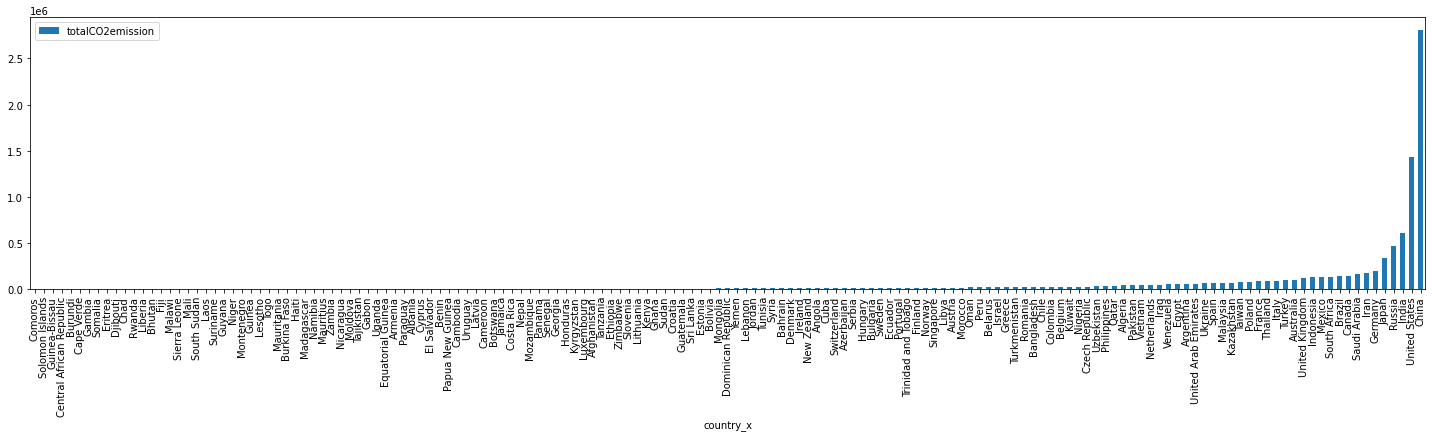

In [47]:
joinedData.sort_values('totalCO2emission').plot.bar('country_x', 'totalCO2emission', figsize=(25,5))

Due to the large number of countries, let's focus on the countries which are major emitters. 

In [48]:
majorEmitters = joinedData[joinedData.totalCO2emission > 20000]
majorEmitters.shape

(43, 3)

<AxesSubplot:xlabel='country_x'>

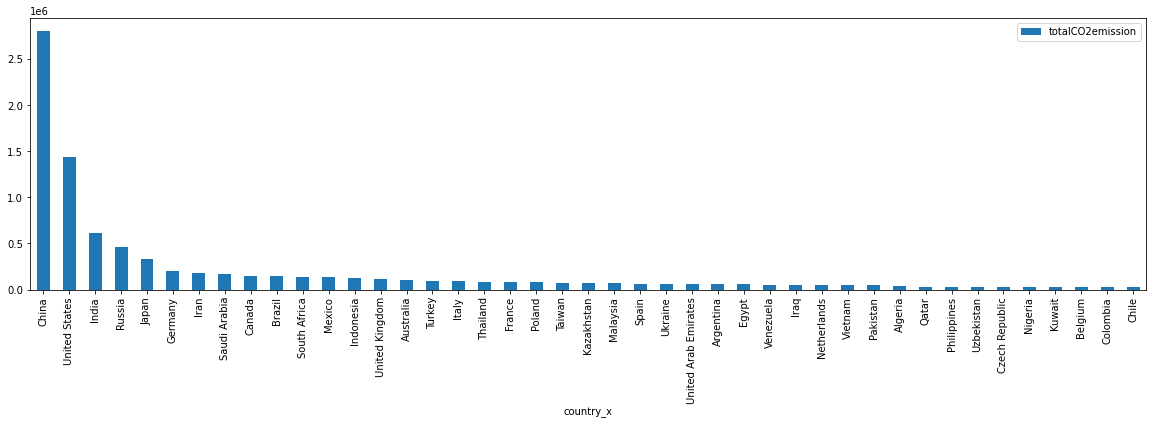

In [49]:
majorEmitters.sort_values('totalCO2emission', ascending=False).plot('country_x', 'totalCO2emission', 
                                                                    kind='bar', figsize=(20,5))